
# 📚 Notebook 5 – Multivariate Linear Regression (Multiple Features)

In this notebook, you will:

- Create a simple dataset with **multiple features**  
- Represent data as a **feature matrix**  
- Define a **multivariate linear regression** model  
- Implement a **vectorized cost function**  
- Implement **gradient descent** in vector form  
- Train the model and make predictions  

This extends univariate linear regression to more than one input feature.



## 1. Creating a Multivariate Dataset

We create a small synthetic dataset with two features:

- \( x_1 \): size (e.g., in square meters)  
- \( x_2 \): number of rooms  

The target \( y \) represents a price (e.g., in thousands).


In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Features: size (m^2) and number of rooms
X = np.array([
    [50, 1],
    [60, 2],
    [80, 2],
    [100, 3],
    [120, 3],
    [140, 4],
    [160, 4]
], dtype=float)

# Target: price (in thousands)
y = np.array([150, 180, 210, 260, 300, 340, 380], dtype=float)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("X:")
print(X)
print("y:")
print(y)


X shape: (7, 2)
y shape: (7,)
X:
[[ 50.   1.]
 [ 60.   2.]
 [ 80.   2.]
 [100.   3.]
 [120.   3.]
 [140.   4.]
 [160.   4.]]
y:
[150. 180. 210. 260. 300. 340. 380.]



## 2. Feature Scaling (Normalization)

When features have different scales, gradient descent can converge slowly.  
We normalize each feature to have:

- Mean ≈ 0  
- Standard deviation ≈ 1  


In [2]:

def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = normalize_features(X)

print("Feature means:", mu)
print("Feature stds:", sigma)
print("First normalized rows:")
print(X_norm[:3])


Feature means: [101.42857143   2.71428571]
Feature stds: [37.95808644  1.03015751]
First normalized rows:
[[-1.35487787 -1.66410059]
 [-1.0914294  -0.69337525]
 [-0.56453245 -0.69337525]]



## 3. Multivariate Linear Model

For two features, the model is:

\[ \hat{y} = w_1 x_1 + w_2 x_2 + b \]

In vector form:

\[ \hat{y} = Xw + b \]

Where:

- \( X \) is an \( m \times n \) matrix  
- \( w \) is an \( n \times 1 \) parameter vector  
- \( b \) is a scalar bias  


In [3]:

def predict(X, w, b):
    return X @ w + b  # matrix-vector multiplication



## 4. Cost Function (Mean Squared Error)

We use the mean squared error cost:

\[ J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^2 \]


In [4]:

def compute_cost(X, y, w, b):
    m = len(y)
    y_hat = predict(X, w, b)
    errors = y_hat - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

m, n = X_norm.shape
w_init = np.zeros(n)
b_init = 0.0

cost_initial = compute_cost(X_norm, y, w_init, b_init)
print("Initial cost with w=zeros, b=0:", cost_initial)


Initial cost with w=zeros, b=0: 36900.0



## 5. Vectorized Gradients

The gradients of the cost with respect to \( w \) and \( b \) are:

\[ \frac{\partial J}{\partial w} = \frac{1}{m} X^T (\hat{y} - y) \]

\[ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) \]


In [5]:

def compute_gradients(X, y, w, b):
    m = len(y)
    y_hat = predict(X, w, b)
    errors = y_hat - y
    dw = (1 / m) * (X.T @ errors)
    db = (1 / m) * np.sum(errors)
    return dw, db

dw_init, db_init = compute_gradients(X_norm, y, w_init, b_init)
print("Initial dw:", dw_init)
print("Initial db:", db_init)


Initial dw: [-78.65818763 -76.27127698]
Initial db: -260.0



## 6. Gradient Descent (Vector Form)

We update parameters using:

\[ w := w - \alpha \frac{\partial J}{\partial w} \]

\[ b := b - \alpha \frac{\partial J}{\partial b} \]

Where \( \alpha \) is the learning rate.


In [6]:

def gradient_descent(X, y, w_init, b_init, learning_rate, num_iterations):
    w = w_init.copy()
    b = b_init
    cost_history = []

    for i in range(num_iterations):
        dw, db = compute_gradients(X, y, w, b)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        if i % 50 == 0:
            print(f"Iteration {i:3d}: cost = {cost:.4f}, w = {w}, b = {b:.4f}")

    return w, b, cost_history

learning_rate = 0.1
num_iterations = 501

w_final, b_final, cost_history = gradient_descent(X_norm, y, w_init, b_init, learning_rate, num_iterations)

print("\nFinal parameters:")
print("w =", w_final)
print("b =", b_final)


Iteration   0: cost = 29395.1930, w = [7.86581876 7.6271277 ], b = 26.0000
Iteration  50: cost = 27.6279, w = [45.03598839 33.9957858 ], b = 258.7940
Iteration 100: cost = 19.0512, w = [49.46356005 29.56937556], b = 259.9938
Iteration 150: cost = 13.7771, w = [53.09235753 25.9405781 ], b = 260.0000
Iteration 200: cost = 10.2334, w = [56.06687707 22.96605856], b = 260.0000
Iteration 250: cost = 7.8523, w = [58.50508603 20.52784961], b = 260.0000
Iteration 300: cost = 6.2525, w = [60.50368204 18.52925359], b = 260.0000
Iteration 350: cost = 5.1776, w = [62.14192804 16.8910076 ], b = 260.0000
Iteration 400: cost = 4.4553, w = [63.48479568 15.54813995], b = 260.0000
Iteration 450: cost = 3.9700, w = [64.58554216 14.44739347], b = 260.0000
Iteration 500: cost = 3.6439, w = [65.48782231 13.54511332], b = 260.0000

Final parameters:
w = [65.48782231 13.54511332]
b = 259.9999999999998



## 7. Cost Over Iterations

Let's visualize how the cost decreases during training.


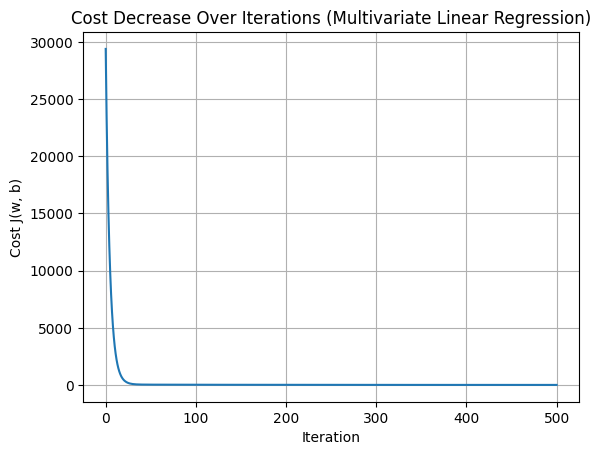

In [7]:

iterations = np.arange(len(cost_history))

plt.figure()
plt.plot(iterations, cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w, b)")
plt.title("Cost Decrease Over Iterations (Multivariate Linear Regression)")
plt.grid(True)
plt.show()



## 8. Making Predictions with the Trained Model

To make a prediction for a new example:

1. Put its features into a vector  
2. Normalize using the same `mu` and `sigma`  
3. Apply \( \hat{y} = Xw + b \)


In [8]:

def predict_new_example(size, rooms, w, b, mu, sigma):
    x_raw = np.array([size, rooms], dtype=float)
    x_norm = (x_raw - mu) / sigma
    y_pred = predict(x_norm, w, b)
    return y_pred

# Example predictions
example1 = predict_new_example(90, 2, w_final, b_final, mu, sigma)
example2 = predict_new_example(130, 3, w_final, b_final, mu, sigma)

print("Predicted price for size=90, rooms=2:", example1)
print("Predicted price for size=130, rooms=3:", example2)


Predicted price for size=90, rooms=2: 230.89082008279493
Predicted price for size=130, rooms=3: 313.05007262253423



## ✅ Summary

In this notebook, you:

- Created a dataset with two features  
- Normalized the features  
- Defined a multivariate linear regression model  
- Implemented a vectorized cost function  
- Computed vectorized gradients  
- Trained parameters using gradient descent  
- Observed cost decreasing over iterations  
- Used the model to make predictions on new samples  



